# Exploratory Data Analysis of Death Metal and Black Metal Band Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = os.path.join('..', 'data', 'band_data.csv')
metal = pd.read_csv(filepath)
black_metal = metal[metal['genre'] == 'black']
death_metal = metal[metal['genre'] == 'death']

In [3]:
metal.head()

,id,url,name,country,genre,full_genre,status
0,3540355748,https://www.metal-archives.com/bands/%DB%9E/35...,۞,United States,black,Black Metal,Split-up
1,3540353044,https://www.metal-archives.com/bands/-_-_-/354...,- - -,Sweden,black,Atmospheric Black Metal,Unknown
2,3540409614,https://www.metal-archives.com/bands/%E2%80%94...,—,China,black,Raw Black Metal,Changed name
3,3540443454,https://www.metal-archives.com/bands/%3AInfern...,:Inferno 9:,Italy,black,Black Metal,Active
4,3540469859,https://www.metal-archives.com/bands/%3AK%C3%A...,:Kælte:,Germany,black,Atmospheric Black Metal,Active


In [4]:
black_metal.head()

,id,url,name,country,genre,full_genre,status
0,3540355748,https://www.metal-archives.com/bands/%DB%9E/35...,۞,United States,black,Black Metal,Split-up
1,3540353044,https://www.metal-archives.com/bands/-_-_-/354...,- - -,Sweden,black,Atmospheric Black Metal,Unknown
2,3540409614,https://www.metal-archives.com/bands/%E2%80%94...,—,China,black,Raw Black Metal,Changed name
3,3540443454,https://www.metal-archives.com/bands/%3AInfern...,:Inferno 9:,Italy,black,Black Metal,Active
4,3540469859,https://www.metal-archives.com/bands/%3AK%C3%A...,:Kælte:,Germany,black,Atmospheric Black Metal,Active


In [5]:
death_metal.head()

,id,url,name,country,genre,full_genre,status
41883,3540273892,https://www.metal-archives.com/bands/%3ATremor...,:Tremor,Russia,death,Death Metal/Grindcore,Active
41884,16265,https://www.metal-archives.com/bands/%21T.O.O....,!T.O.O.H.!,Czechia,death,Progressive Death Metal/Grindcore,Active
41885,109481,https://www.metal-archives.com/bands/%21%C3%BA...,!úl..,Czechia,death,Death/Black Metal,Split-up
41886,19272,https://www.metal-archives.com/bands/...and_He...,...and Here I Lie,United States,death,Death/Doom Metal,Split-up
41887,24544,https://www.metal-archives.com/bands/...and_Th...,...and They Will Meet God,United States,death,Melodic Death Metal/Crossover,Split-up


## Band Names

In [6]:
metal['name'].value_counts(ascending=False)

Abaddon               32
Mortuary              29
Necrosis              28
Legion                26
Demogorgon            23
                      ..
Discrementor           1
Sinister Superstar     1
Perpetua               1
Subtrash               1
Blut Formicarium       1
Name: name, Length: 73970, dtype: int64

## Comparison of Black and Death Genres

In [7]:
metal['genre'].value_counts()

death    51151
black    41883
Name: genre, dtype: int64

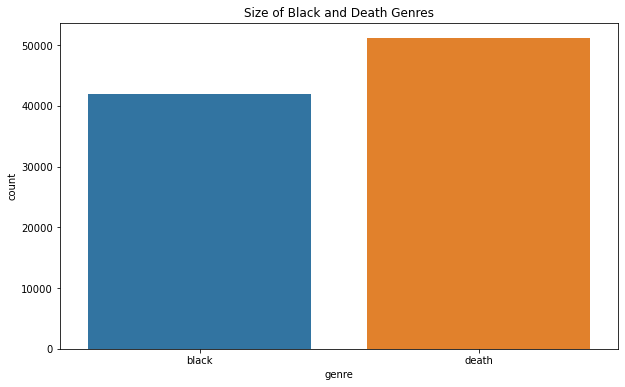

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=metal, x='genre', ax=ax)
ax.set_title('Size of Black and Death Genres')
plt.show()

## Countries of Origin for Black and Death Metal Bands

In [9]:
metal_top_20_country = metal['country'].value_counts(ascending=False).head(20)

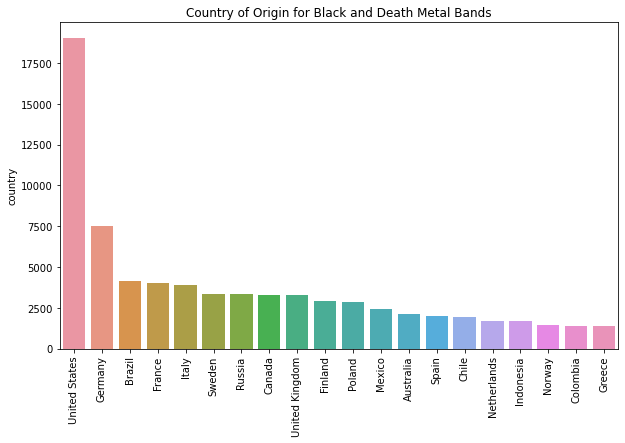

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=metal_top_20_country.index, y=metal_top_20_country, ax=ax)
ax.set_title('Country of Origin for Black and Death Metal Bands')
ax.set_xticklabels(metal_top_20_country.index, rotation=90)
plt.show()

In [11]:
black_metal_top_20_country = black_metal['country'].value_counts(ascending=False).head(20)

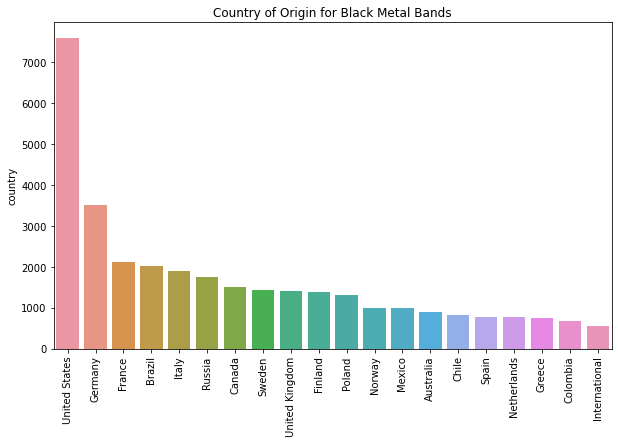

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=black_metal_top_20_country.index, y=black_metal_top_20_country, ax=ax)
ax.set_title('Country of Origin for Black Metal Bands')
ax.set_xticklabels(black_metal_top_20_country.index, rotation=90)
plt.show()

In [13]:
death_metal_top_20_country = death_metal['country'].value_counts(ascending=False).head(20)

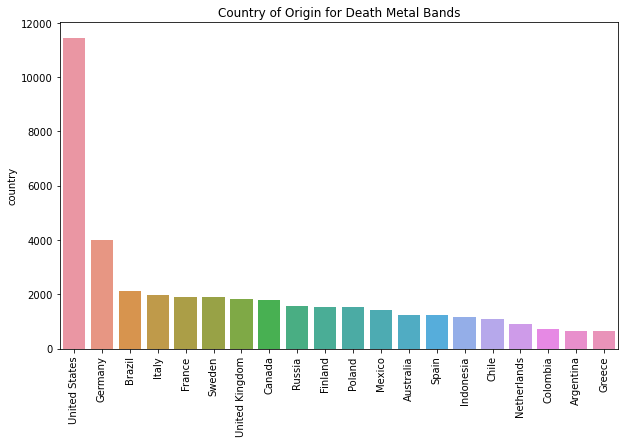

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=death_metal_top_20_country.index, y=death_metal_top_20_country, ax=ax)
ax.set_title('Country of Origin for Death Metal Bands')
ax.set_xticklabels(death_metal_top_20_country.index, rotation=90)
plt.show()

## Exploring The Full Genre Column

In [15]:
metal['full_genre'].value_counts()

Black Metal                                        18791
Death Metal                                        12292
Black/Death Metal                                   6014
Melodic Death Metal                                 3790
Death/Thrash Metal                                  3337
                                                   ...  
Death Metal (early); Heavy/Gothic Metal (later)        1
Ambient (early), Depressive Black Metal (later)        1
Avant-garde/Atmospheric Blackened Doom Metal           1
Industrial Black Metal/Martial Dark Ambient            1
Black Metal/Black 'n' roll                             1
Name: full_genre, Length: 5401, dtype: int64

In [35]:
full_genre_df = metal['full_genre']\
    .str.replace('Metal', '').str.replace('\(.*\)', '', regex=True)\
    .str.split(';|/', expand=True)
mapper_dict = {
    0: 'genre_1', 1: 'genre_2', 2: 'genre_3', 3: 'genre_4', 
    4: 'genre_5', 5: 'genre_6', 6: 'genre_7', 7: 'genre_8'
    }
full_genre_df = full_genre_df.rename(mapper_dict, axis=1)

In [36]:
full_genre_df.head(20)

,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,Black,None,None,None,None,None,None,None
1,Atmospheric Black,None,None,None,None,None,None,None
2,Raw Black,None,None,None,None,None,None,None
3,Black,None,None,None,None,None,None,None
4,Atmospheric Black,None,None,None,None,None,None,None
5,Depressive Black,None,None,None,None,None,None,None
6,Death,Black,None,None,None,None,None,None
7,Depressive Black,None,None,None,None,None,None,None
8,Black,None,None,None,None,None,None,None
9,Atmospheric Black,None,None,None,None,None,None,None
